In [1]:
#prepare for the spatial joint and geo data processing
import geopandas as gp
from shapely.geometry import Point, MultiPoint
from shapely.geometry import Point
from geopandas.tools import overlay
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/shu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Merge shapefile with city level

In [3]:
import pandas as pd


In [4]:
chinaProShp1 = gp.GeoDataFrame.from_file('../Data/china_shapefile/gadm36_CHN_2.shp')
chinaProShp1.NAME_2.count()

344

In [6]:
chinaProShp1

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,Ānqìng,安庆市,Dìjíshì,Prefecture City,,,"POLYGON ((116.58146667 30.04758644, 116.578948..."
1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.2_1,Bengbu,Bèngbù,蚌埠市,Dìjíshì,Prefecture City,,,"POLYGON ((117.52263641 32.98103333, 117.522827..."
2,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.3_1,Bozhou,Bózhōu,亳州市,Dìjíshì,Prefecture City,,,"POLYGON ((116.18904877 32.89638519, 116.190826..."
3,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.4_1,Chaohu,Cháohú,巢湖市,Dìjíshì,Prefecture City,,,"POLYGON ((118.30015564 31.42490387, 118.304946..."
4,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.5_1,Chizhou,Chízhōu,池州市,Dìjíshì,Prefecture City,,,"POLYGON ((117.20088196 29.9299736, 117.1982574..."
5,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.6_1,Chuzhou,Chúzhōu,滁州市,Dìjíshì,Prefecture City,,,"POLYGON ((117.81350708 32.01014709, 117.816223..."
6,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.7_1,Fuyang,Fùyáng,阜阳市,Dìjíshì,Prefecture City,,,"POLYGON ((115.95753479 32.60298538, 115.947143..."
7,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.8_1,Hefei,Héféi,合肥市,Dìjíshì,Prefecture City,,,"POLYGON ((116.82662964 31.52187157, 116.818580..."
8,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.9_1,Huaibei,Huáiběi,淮北市,Dìjíshì,Prefecture City,,,"POLYGON ((116.99124908 33.93666077, 116.989601..."
9,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.10_1,Huainan,Huáinán,淮南市,Dìjíshì,Prefecture City,,,"POLYGON ((117.18423462 32.61909103, 117.179893..."


In [9]:
#adding the city level
tier1=['北京|北京','上海|上海','广州市','深圳市'] 
tier2=['杭州市','南京市','济南市','重慶|重庆','青岛市','大连市','宁波市','厦门市','成都市','哈尔滨市',
       '武汉市','天津市','苏州市','西安市','长沙市','沈阳市','青岛市','郑州市','大连市','东莞市','宁波市',
       '厦门市','福州市','无锡市','合肥市','昆明市','济南市','佛山市','长春市','温州市','石家庄市','南宁市','常州市','泉州市',
       '南昌市','贵阳市','太原市','烟台市','嘉兴市','南通市','金华市','珠海市','惠州市','徐州市','海口市','乌鲁木齐市','绍兴市',
       '中山市','台州市','兰州市']
tier3=['潍坊市','保定市','镇江市','扬州市','桂林市','唐山市','三亚市','湖州市','呼和浩特市',
       '廊坊市','洛阳市','威海市','盐城市','临沂市','江门市','汕头市','泰州市','漳州市','邯郸市','济宁市','芜湖市','淄博市',
       '银川市','柳州市','绵阳市','湛江市','鞍山市','赣州市','大庆市','宜昌市','包头市','咸阳市','秦皇岛市','株洲市|株洲市','莆田市',
       '吉林市','淮安市','肇庆市','宁德市','衡阳市|衡陽市','南平市','连云港市','丹东市','丽江市','揭阳市','延边朝鲜族自治州','舟山市',
       '九江市','龙岩市','沧州市','抚顺市','上饶市','三明市','蚌埠市','丽水市','岳阳市','清远市','荆州市','泰安市',
       '衢州市','盘锦市','东营市','南阳市','马鞍山市','南充市','西宁市','孝感市','齐齐哈尔市']


In [10]:
temp=chinaProShp1.NL_NAME_2

In [11]:

cityLevelSP=[]
for i in temp:
    if i in tier1:
        cityLevelSP.append('1')
    elif i in tier2:
        cityLevelSP.append('2')
    elif i in tier3:
        cityLevelSP.append('3')
    else:
        cityLevelSP.append('4')

In [12]:
chinaProShp1['cityLevelSP']=cityLevelSP

In [13]:
chinaProShp2=chinaProShp1[['NL_NAME_2','cityLevelSP']]
# chinaProShp2.to_csv('../chinaProShp2.csv', sep='\t', encoding='utf-8')

<Figure size 432x288 with 0 Axes>

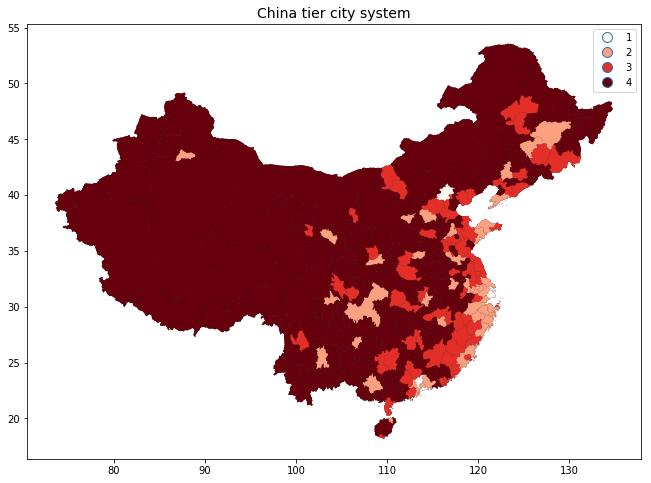

In [14]:
plt.clf()
fig, ax = plt.subplots(1,figsize=(11, 8))
chinaProShp1.plot(ax=ax, color='black')

chinaProShp1.plot(ax=ax,column='cityLevelSP', legend=True,label=True, cmap='Reds');
ax.set_title("China tier city system",fontsize=14)

leg = ax.get_legend()

# leg.get_frame().set_borderpad('none')
leg.get_frame().set_facecolor('none')

# plt.savefig('figures/cityTierSystem.png')
plt.show()


In [23]:
#shapefile city list
SPCityList=chinaProShp1.NL_NAME_2.unique()

## Clean and explore raw data

In [603]:
scrape= pd.read_csv('../datasetFinal.csv', encoding='utf8')
scrape=scrape[['ID','Age', 'Gender', 'Status','Loc1','Loc2','Height','Weight','Salary','Education','Car',
                     'House','AgeR','HeightR','EduR','StaR','LocR','PicR','Hukou','Intro']]


In [777]:
len(scrape)

32572

In [ ]:
# mapping catagrocial to num index
# w['female'] = w['female'].map({'female': 1, 'male': 0})


In [969]:
df2= pd.read_csv('../df2focusCity.csv', encoding='utf8')


In [970]:
len(df2)

30754

In [110]:
nonSP=pd.DataFrame(chinaProShp1)
# nonSP.groupby('cityLevelSP')['NAME_2'])
nonSP
# nonSP.NAME_2.loc(nonSP.==1)
# temp3=nonSP.NAME_2.loc[nonSP['cityLevelSP'] == '3'].to_frame()
len(nonSP.NAME_2.loc[nonSP['cityLevelSP'] == '2'].unique())
# for i in temp3.NAME_2:
#     tempL.append(i)
    
# list(tempL)
# tempL
# dfloc2=df2.groupby(['Loc2'])['Gender'].count().to_frame()

43

In [93]:
nonSP.NAME_2.loc[nonSP['cityLevelSP'] == '3'].count()

67

In [89]:
nonSP.head(3)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,cityLevelSP
0,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.1_1,Anqing,Ānqìng,安庆市,Dìjíshì,Prefecture City,,,"POLYGON ((116.58146667 30.04758644, 116.578948...",4
1,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.2_1,Bengbu,Bèngbù,蚌埠市,Dìjíshì,Prefecture City,,,"POLYGON ((117.52263641 32.98103333, 117.522827...",3
2,CHN,China,CHN.1_1,Anhui,安徽|安徽,CHN.1.3_1,Bozhou,Bózhōu,亳州市,Dìjíshì,Prefecture City,,,"POLYGON ((116.18904877 32.89638519, 116.190826...",4


In [59]:
temp1

In [953]:
# dfloc2=df.groupby(['Loc2'])['Gender'].count().to_frame()
# df2.groupby(['cityLevel'])['Gender'].count().to_frame()
df2.groupby(['cityLevel']).count()

,Unnamed: 0,ID,Age,Gender,Status,Loc1,Loc2,Height,Weight,Salary,...,Car,House,AgeR,HeightR,EduR,StaR,LocR,PicR,Hukou,Intro
cityLevel,,,,,,,,,,,,,,,,,,,,,
1,3904,3904,3904,3904,3904,3904,3904,3904,3904,3904,...,3904,3904,3904,3904,3904,3904,3904,3904,3904,3904
2,10295,10295,10295,10295,10295,10295,10295,10295,10295,10295,...,10295,10295,10295,10295,10295,10295,10295,10295,10295,10295
3,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652,...,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652
4,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903,...,11903,11903,11903,11903,11903,11903,11903,11903,11903,11903


In [973]:
len(df2)

30754

In [974]:
numTier=[4,51,67, 222]
des=df2['cityLevel'].value_counts(dropna=True).to_frame()
des['numTier']=numTier
des['aveUser']=des.cityLevel/des.numTier
des

,cityLevel,numTier,aveUser
4,11903,4,2975.750000
2,10295,51,201.862745
3,4652,67,69.432836
1,3904,222,17.585586


In [975]:
df2.head(1)

,Unnamed: 0,ID,Age,Gender,Status,Loc1,Loc2,Height,Weight,Salary,...,House,AgeR,HeightR,EduR,StaR,LocR,PicR,Hukou,Intro,cityLevel
0,1,177998302,36,1,未婚,浙江,温州,173cm,--,5000～10000元,...,0,29-37岁之间,155-170厘米,不限,不限,浙江温州,不限,--,...,2


In [976]:
df2.rename(columns={'Loc2': 'City','Loc1': 'Province'}, inplace=True)


In [851]:
dfNetwork= pd.read_csv('../dfNetwork.csv', encoding='utf8')


In [886]:
dfNetwork.head(4)

,ID,Loc1,City,LocR,Proximity
0,177998302,浙江,温州,浙江温州,1
1,177998303,四川,成都,四川,2
2,177998305,江西,宜春,江西,2
3,177998306,吉林,吉林,吉林,2


In [962]:
dfNetwork.groupby('Proximity').count()

,ID,Loc1,City,LocR,ProximityNew
Proximity,,,,,
0,1525,1525,1525,1525,1525
1,19168,19168,19168,19168,19168
2,9553,9553,9553,9553,9553
4,508,508,508,508,508


In [913]:
Proximity=dfNetwork.Proximity
type(Proximity.tolist())

list

In [917]:
ProximityNew=[]
for i in Proximity:
    if (i==0):
        i=3
    else:
        i=i
    ProximityNew.append(i)
    


In [920]:
dfNetwork['ProximityNew']=ProximityNew

In [977]:
df2['Proximity']=ProximityNew

In [979]:
df3=df2[['ID','Age','Gender','Status','Province','City','Height','Salary','Education','Car','House','LocR',
         'cityLevel','Proximity','PicR','Intro']]

In [983]:
df3.head(1)

,ID,Age,Gender,Status,Province,City,Height,Salary,Education,Car,House,LocR,cityLevel,Proximity,PicR,Intro
0,177998302,36,1,未婚,浙江,温州,173cm,5000～10000元,高中中专及以下,0,0,浙江温州,2,1,不限,...


In [982]:
len(df3)
df3.to_csv('../dataClean.csv', sep='\t', encoding='utf-8')

In [905]:
dfNetwork['Proximity']=dfNetwork['Proximity'].replace('0','3')

In [885]:
dfNetwork=dfNetwork[['ID','Loc1','City','LocR','Proximity']]
dfNetwork['LocR']=dfNetwork.LocR.replace("不限","All")
dfNetwork['LocR'].unique()

array(['浙江温州', '四川', '江西', '吉林', '广东揭阳', '内蒙古呼伦贝尔', '河北邯郸', '辽宁丹东', '辽宁大连',
       '山西忻州', '重庆', '福建福州', '广东', '上海黄浦', '江西吉安', '河南郑州', '内蒙古', '湖南长沙',
       '浙江杭州', '广东中山', '广西南宁', '河北石家庄', '四川成都', '江苏南京', '吉林长春', '江西上饶',
       '云南昆明', '山东济南', '安徽合肥', '河北', '广东深圳', '福建', '陕西宝鸡', '山西', '福建泉州',
       '新疆喀什', '西藏', '上海虹口', '云南曲靖', '山西临汾', '广东东莞', 'All', '山东', '甘肃张掖',
       '湖北襄阳', '山东烟台', '北京东城', '河南周口', '山西朔州', '江苏南通', '甘肃天水', '安徽',
       '贵州六盘水', '内蒙古呼和浩特', '山东泰安', '广东广州', '黑龙江伊春', '河南', '浙江', '河南南阳',
       '河南平顶山', '四川雅安', '河北唐山', '湖南湘潭', '北京', '四川遂宁', '山西太原', '辽宁营口',
       '贵州黔东南', '辽宁葫芦岛', '辽宁', '新疆', '陕西西安', '内蒙古乌海', '湖南株洲', '甘肃武威',
       '广东佛山', '广东肇庆', '上海浦东新区', '山东青岛', '河南洛阳', '安徽宣城', '四川资阳', '广西玉林',
       '上海闵行', '辽宁沈阳', '河南安阳', '黑龙江牡丹江', '广东珠海', '河北邢台', '四川南充', '北京朝阳',
       '浙江宁波', '甘肃', '湖北', '浙江台州', '广东潮州', '江西南昌', '湖南', '青海黄南', '云南丽江',
       '海南海口', '湖南怀化', '辽宁本溪', '宁夏', '甘肃兰州', '吉林松原', '海南文昌', '甘肃白银',
       '安徽阜阳', '吉林延边', '江苏', '四川达州', '江苏宿迁', '海南三亚', '山东东营', '

In [987]:
dfNetwork.drop(['Proximity'],axis=1)


,ID,Loc1,City,LocR,ProximityNew
0,177998302,浙江,温州,浙江温州,1
1,177998303,四川,成都,四川,2
2,177998305,江西,宜春,江西,2
3,177998306,吉林,吉林,吉林,2
4,177998308,广东,揭阳,广东揭阳,1
5,177998309,内蒙古,呼伦贝尔,内蒙古呼伦贝尔,1
6,177998310,河北,邯郸,河北邯郸,1
7,177998311,辽宁,丹东,辽宁丹东,1
8,177998312,辽宁,大连,辽宁大连,1
9,177998314,山西,忻州,山西忻州,1


In [856]:
dfNetworkS=dfNetwork[dfNetwork.Proximity==0]

In [877]:
dfNetworkS=dfNetworkS[['ID','City','LocR']]
dfNetworkS

31        深圳
86        北京
99        不限
113       北京
126       北京
128       北京
137       北京
140       北京
163       北京
165       北京
189       不限
237       上海
238       北京
245       北京
268       北京
277       湖北
307       北京
311       北京
338      哈尔滨
351       北京
352       不限
406       不限
408       香港
413       不限
418       北京
420       北京
509       北京
512       不限
537       上海
549       不限
        ... 
30484     重庆
30486     不限
30489     北京
30495     不限
30502     不限
30517     北京
30528     不限
30535     朝阳
30545     不限
30549     北京
30566     北京
30567     北京
30585     北京
30590     北京
30596     北京
30611     北京
30616     北京
30623     不限
30641     咸阳
30651     北京
30662     北京
30665     不限
30670     北京
30671     北京
30682     北京
30691     北京
30694     北京
30708     北京
30745     北京
30748     北京
Name: LocR, Length: 1913, dtype: object

In [879]:
# dfNetworkS['LocR']=dfNetworkS.LocR.replace("北京东城","北京").replace("广东深圳","深圳").replace("黑龙江哈尔滨",
#         "哈尔滨").replace("香港香港",'香港').replace("上海黄浦",'上海').replace("山东威海",
#         '威海').replace("河北石家庄",'石家庄').replace("河南信阳",'信阳').replace("山东青岛",
#         '青岛').replace('广东韶关','韶关').replace('甘肃兰州','兰州').replace('山东淄博','淄博').replace('山西晋城',
#         '晋城').replace('安徽淮北','淮北').replace('上海浦东新区','上海').replace('陕西西安','西安').replace('江苏苏州',
#         '苏州').replace('广东汕尾','汕尾').replace('山东德州','德州').replace('广东东莞广东深圳','深圳').replace('山东青岛山东潍坊',
#         '青岛').replace('湖南长沙','长沙').replace('四川雅安','雅安').replace('广东广州','广州').replace('云南昆明',
#         '昆明').replace('浙江温州','温州').replace('安徽淮南','淮南').replace('湖北襄阳','襄阳').replace('浙江台州',
#         '台州').replace('北京朝阳','朝阳').replace('江西上饶江西抚州江西宜春','上饶').replace('湖北襄阳','襄阳').replace('福建泉州',
#         '泉州').replace('福建福州','福州').replace('江苏南京上海北京','南京').replace('四川成都河南郑州北京','成都').replace('广西防城港',  
#         '防城港').replace('广东深圳湖北武汉','深圳').replace('浙江杭州上海','杭州').replace('浙江杭州','杭州').replace('浙江',
#         '杭州').replace('山东淄博山东济南','淄博').replace('湖南','长沙').replace('山西临汾山西太原北京','临汾').replace('湖北黄冈',
#         '黄冈').replace('广东惠州','惠州').replace('湖南娄底','娄底').replace('贵州遵义','遵义').replace('湖南湘潭',
#         '湘潭').replace('黑龙江哈尔滨广西桂林国外其他','哈尔滨').replace('贵州贵阳','贵阳').replace('河南郑州',
#         '郑州').replace('广西南宁','南宁').replace('海南北京天津浙江上海江苏山东重庆云南江西','海南').replace('广西柳州',
#         '柳州').replace('江苏南京','南京').replace('河南驻马店','驻马店').replace('青海海南','青海').replace('山东烟台',
#         '烟台').replace('湖北黄石','黄石').replace('四川成都','成都').replace('福建厦门','厦门').replace('海南海口',
#          '海口').replace('四川绵阳','绵阳').replace('山东东营','东营').replace('上海嘉定','上海').replace('安徽合肥', 
#          '合肥').replace('湖北十堰','十堰').replace('浙江金华','金华').replace('广东','广州').replace('湖北武汉',                                                                              
#        '武汉').replace('甘肃甘南','甘南').replace('内蒙古呼伦贝尔','内蒙古').replace('贵州铜仁','铜仁').replace('新疆乌鲁木齐', 
#      '乌鲁木齐').replace('江西赣州','赣州').replace('福建','厦门').replace('湖北孝感','孝感').replace('广东汕头',
#       '汕头').replace('安徽亳州','亳州').replace('河北石家庄河北衡水河北沧州','石家庄').replace('河南郑州河南南阳湖北随州',
#         '郑州').replace('湖南邵阳','邵阳').replace('山西太原','太原').replace('河北邯郸','邯郸').replace('安徽宿州',
#        '宿州').replace('山东潍坊','潍坊').replace('河北张家口','张家口').replace('广东中山','中山').replace('湖南岳阳',                                                                              
#        '岳阳').replace('辽宁葫芦岛','葫芦岛').replace('江西景德镇','景德镇').replace('陕西咸阳','咸阳').replace('河南许昌',
# '许昌').replace('上海闵行','上海').replace('浙江杭州浙江宁波浙江绍兴','杭州').replace('广东潮州','潮州').replace('广西钦州',                                                                              
#        '钦州').replace('湖南常德','常德').replace('上海虹口','上海').replace('山西阳泉','阳泉').replace('山东菏泽',
#     '菏泽').replace('吉林四平','四平').replace('广东河源','河源').replace('广东清远','清远').replace('广东湛江',                                                                                   
#     '湛江').replace('安徽滁州','滁州').replace('浙江嘉兴','嘉兴').replace('江苏常州','常州').replace('贵州黔东南',  
#     '黔东南').replace('山东威海山东烟台山东青岛','威海').replace('江西九江广东深圳','九江').replace('河北石家庄江苏南通',
#     '石家庄').replace('四川乐山','乐山').replace('河南濮阳河南郑州河南新乡','濮阳').replace('湖北荆州','荆州').replace('辽宁铁岭',                                                                                 
# '铁岭').replace('上海徐汇','徐汇').replace('四川达州','达州').replace('辽宁沈阳','沈阳').replace('江苏浙江湖南',                                                                                 
#     '苏州').replace('江西吉安','吉安').replace('江西宜春','宜春').replace('新疆克拉玛依','克拉玛依').replace('浙江绍兴浙江杭州',       
#       '苏州').replace('安徽江西湖北','武汉').replace('不限','All')
      
# dfNetworkS.LocR.unique()

array(['深圳', '北京', 'All', '上海', '湖北', '哈尔滨', '香港', '威海', '石家庄', '信阳', '青岛',
       '陕西', '韶关', '兰州', '淄博', '晋城', '重庆', '淮北', '河南', '美国华盛顿DC', '西安',
       '苏州', '山东', '贵州', '汕尾', '德州', '四川', '江苏', '江西', '长沙', '雅安', '广州',
       '昆明', '温州', '淮南', '襄阳', '黑龙江', '台州', '朝阳', '上饶', '南京', '泉州', '福州',
       '成都', '防城港', '杭州', '临汾', '黄冈', '内蒙古', '惠州', '娄底', '遵义', '湘潭', '贵阳',
       '郑州', '南宁', '海南', '天津', '柳州', '驻马店', '青海', '国外', '烟台', '黄石', '厦门',
       '海口', '绵阳', '东营', '山西', '河北', '国外瑞士', '合肥', '十堰', '金华', '国外新加坡',
       '武汉', '广西', '甘南', '铜仁', '乌鲁木齐', '赣州', '孝感', '汕头', '亳州', '邵阳', '太原',
       '邯郸', '宿州', '潍坊', '张家口', '中山', '岳阳', '葫芦岛', '许昌', '潮州', '钦州', '常德',
       '阳泉', '菏泽', '四平', '河源', '清远', '湛江', '滁州', '嘉兴', '常州', '黔东南', '九江',
       '乐山', '濮阳', '荆州', '铁岭', '徐汇', '达州', '沈阳', '吉安', '宜春', '克拉玛依', '景德镇',
       '咸阳'], dtype=object)

In [821]:
dfNet1.to_csv('../dfNet1.csv', sep='\t', encoding='utf-8')

In [1002]:
dfNetwork.to_csv('../dfNetwork.csv', sep='\t', encoding='utf-8')

In [1025]:
# dfNetworkDraw=dfNetworkS[[dfNetworkS.To!='All']]
dfNetworkDraw=dfNetworkS[dfNetworkS.To!='All']

In [1030]:
dfNetworkDraw.To.unique()

array(['深圳', '北京', '上海', '湖北', '哈尔滨', '香港', '威海', '石家庄', '信阳', '青岛', '陕西',
       '韶关', '兰州', '淄博', '晋城', '重庆', '淮北', '河南', '西安', '苏州', '山东', '贵州',
       '汕尾', '德州', '四川', '江苏', '江西', '长沙', '雅安', '广州', '昆明', '温州', '淮南',
       '襄阳', '黑龙江', '台州', '朝阳', '上饶', '南京', '泉州', '福州', '成都', '防城港', '杭州',
       '临汾', '黄冈', '内蒙古', '惠州', '娄底', '遵义', '湘潭', '贵阳', '郑州', '南宁', '海南',
       '天津', '柳州', '驻马店', '青海', '烟台', '黄石', '厦门', '海口', '绵阳', '东营', '山西',
       '河北', '合肥', '十堰', '金华', '武汉', '广西', '甘南', '铜仁', '乌鲁木齐', '赣州', '孝感',
       '汕头', '亳州', '邵阳', '太原', '邯郸', '宿州', '潍坊', '张家口', '中山', '岳阳', '葫芦岛',
       '许昌', '潮州', '钦州', '常德', '阳泉', '菏泽', '四平', '河源', '清远', '湛江', '滁州',
       '嘉兴', '常州', '黔东南', '九江', '乐山', '濮阳', '荆州', '铁岭', '徐汇', '达州', '沈阳',
       '吉安', '宜春', '克拉玛依', '景德镇', '咸阳'], dtype=object)

In [1029]:
dfNetworkDraw['To']=dfNetworkDraw.To.replace('国外','北京').replace('国外瑞士','上海').replace('国外新加坡','广州')

/Users/shu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1027]:
len(dfNetworkDraw)

1525

In [991]:
fromLevel=[]
toLevel=[]


In [992]:
for i in dfNetworkS.From:
    if i in tier1:
        fromLevel.append('1')
    elif i in tier2:
        fromLevel.append('2')
    elif i in tier3:
        fromLevel.append('3')
    else:
        fromLevel.append('4')
    
    
dfNetworkS['fromLevel']=fromLevel

In [993]:
for i in dfNetworkS.To:
    if i in tier1:
        toLevel.append('1')
    elif i in tier2:
        toLevel.append('2')
    elif i in tier3:
        toLevel.append('3')
    else:
        toLevel.append('4')
    
    
dfNetworkS['toLevel']=toLevel

In [1031]:
dfNetworkDraw.to_csv('../dfNetworkDraw.csv', sep='\t', encoding='utf-8')

In [1053]:
type(dfNetworkDraw1)

pandas.core.frame.DataFrame

In [1056]:
# dfNetworkDraw2=dfNetworkDraw1[['From','To','route']]
dfNetworkDraw1=dfNetworkDraw1.reset_index(level=['From', 'To'])

In [1057]:
dfNetworkDraw1=dfNetworkDraw1[['From', 'To','route']]

In [1059]:
dfNetworkDraw1.to_csv('../dfNetworkDraw1.csv', sep='\t', encoding='utf-8')

In [770]:
mergeTest=pd.merge(df2, pop, on='City')

In [805]:
mergeTest.describe()

,ID,Age,Gender,Car,House,Pop
count,3.073800e+04,30738.000000,30738.000000,30738.000000,30738.000000,30738.000000
mean,1.779843e+08,30.465840,0.631108,0.023131,0.012818,754.354174
std,1.405195e+04,7.823301,0.482512,0.150322,0.112491,623.216790
min,1.779600e+08,18.000000,0.000000,0.000000,0.000000,9.550000
25%,1.779714e+08,25.000000,0.000000,0.000000,0.000000,325.260000
50%,1.779836e+08,29.000000,1.000000,0.000000,0.000000,581.780000
75%,1.779982e+08,34.000000,1.000000,0.000000,0.000000,871.510000
max,1.780070e+08,99.000000,1.000000,1.000000,1.000000,2884.620000


In [636]:
dfloc2=df2.groupby(['Loc2'])['Gender'].count().to_frame()

In [638]:
len(dfloc2)

344

In [760]:
dfloc2=pd.read_csv('../dfloc2.csv', sep='\t', encoding='utf-8')

In [762]:
dfMerge=pd.merge(dfloc2, pop, on='City')

In [764]:
dfMerge['Density']=dfMerge['Gender']/dfMerge['Pop']

In [774]:
cityLevel2=[]
for i in dfMerge.City:
    if i in tier1:
        cityLevel2.append('1')
    elif i in tier2:
        cityLevel2.append('2')
    elif i in tier3:
        cityLevel2.append('3')
    else:
        cityLevel2.append('4')
    
    
dfMerge['cityLevel']=cityLevel2

In [471]:
dfloc2=df2.groupby(['Loc2'])['Gender'].count().to_frame()

In [ ]:
dflocNor=pd.merge(dfloc2, pop, on='company')

In [776]:
dfMerge.to_csv('../dfMergeCity.csv', sep='\t', encoding='utf-8')

In [473]:
locRank=df['Loc2'].value_counts(dropna=True).to_frame()
len(locRank)

398

In [319]:
df.groupby(['cityLevel','Gender'])['Age'].mean()

cityLevel  Gender
1          0         27.830258
           1         29.922210
2          0         28.685580
           1         30.019073
3          0         30.054070
           1         31.895588
4          0         30.055055
           1         31.383033
Name: Age, dtype: float64

In [323]:
df.groupby(['cityLevel','Gender'])['Age'].count()

cityLevel  Gender
1          0           542
           1           887
2          0          3613
           1          5610
3          0          1683
           1          2969
4          0          5776
           1         10208
Name: Age, dtype: int64

In [321]:
df.groupby(['cityLevel', 'Gender'])['Age'].agg(lambda x: x.unique().mean())

cityLevel  Gender
1          0         36.685714
           1         38.595238
2          0         41.562500
           1         45.074074
3          0         39.727273
           1         44.803922
4          0         44.039216
           1         45.574074
Name: Age, dtype: float64

In [590]:
df2.to_csv('../df2focusCity.csv', sep='\t', encoding='utf-8')

## Clean the textual data

In [177]:
introList=d1.Intro.unique().tolist()

In [179]:
#nlp chinese word clustering topic study
import re
import jieba
import jieba.analyse
import codecs
import nltk
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import numpy
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [180]:
import re


In [245]:
#prepare sentence
sentence=[]

for i in introList:
    i=i.replace(" ", "")
    #get rid of symbol
    i = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",i)
    sentence.append(i)
#     wordList.append(i.replace(" ", ""))

In [246]:
sentence

['我是世纪佳缘手机版用户我的世界总是很安静静得都能听见自己的心跳和呼吸独自行走独自唱歌独自逛街独自看着一整个世界狂欢我羡慕那些手拉手逛公园的情侣我妒忌那些捧着爆米花在影院出双入对的爱人',
 '',
 '福兮祸之所伏祸兮福之所倚大可不必太在意人生历程的潮涨潮落只要悟透了其中的禅机便会豁然开朗生命也有保质期想做的事该趁早去做如果你只是把你的心愿慎重地供奉在心里却未曾去履行',
 '我是世纪佳缘手机版用户你知道表为什么是圆的吗因为每次到头了它都能再重新开始可惜的是我们的人生不是圆的我们的生活是不能真正的从头开始的所以我很珍惜自己生命中的每一个过客在佳缘我希望自',
 '命运带给每个人截然不同的经历无论是艰辛痛苦或是潸然泪下都是促使人成长的使然随着时间的打磨让我改去了个性学会了随性忘有缘人放慢你的节拍和脚步我想找到一位能和我相依相偎且能共同成长打造人生的人',
 '爱一个人意味着什么呢这意味着为他的幸福而高兴为使他能够幸福而去做需要做的一切并从这当中得到快乐一般的宿命就是我们总会遇见一些人遭遇一些事然后看着命中注定的事发生却无能为力而我的宿命',
 '当我的人生路开始曲曲折折是否你也曾有相同经历当“你什么都不差只差一个我”的时候当“我什么都不缺只缺一个你”的时候是否我们还可以相遇',
 '一棵充塞宇宙的大树无边无际星星是它的果实可它的树干在哪里向西行去攀那根天柱也许它这棵大树的树干我想你一定能攀上这棵大树安坐枝杈间饕餮蜜桃你如同西部璀璨的星空长久地闪亮我心底我常在梦中回返像从浊世重登',
 '缘起缘灭缘浓缘淡缘深缘浅不是我们能够控制的但我们能做到的是在因缘际会的时侯好好的把握和珍惜我是世纪佳缘手机版用户我选择在佳缘谱写我的缘分篇章因为我相信那妙不可言的缘分定会在这里指引我找到适合自己的爱人',
 '于千万人之中遇见我要遇见的人于千万年之中时间无涯的荒野里没有早一步也没有迟一步遇上了也只能轻轻地说一句：“哦你也在这里吗”我是世纪佳缘手机版用户期待着在佳缘能够遇见你那时那刻我',
 '爱情终究是缘分茫茫人海两个人的相识相爱本身就是一种巧合你会是我的那个巧合吗',
 '我是一个简单的人我有些特长：过目不忘不挑食是不是很有趣呢我的工作属于IT业',
 '涐很努力ｄ偽裝咱巳沒想到還是被祂看出來了',
 '关于外貌简单形容就是中等身材我的工作属于医务工作者我生长在一个单亲家庭我爱我

In [597]:
pd.DataFrame(sentence).to_csv('../sentence.csv', sep='\t', encoding='utf-8')